<a href="https://colab.research.google.com/github/drosas1295/Ingen-IA/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c playground-series-s3e6
!unzip playground-series-s3e6.zip

playground-series-s3e6.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  playground-series-s3e6.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 1. Lectura del dataset

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


## 2. Análisis de la variable objetivo (price)

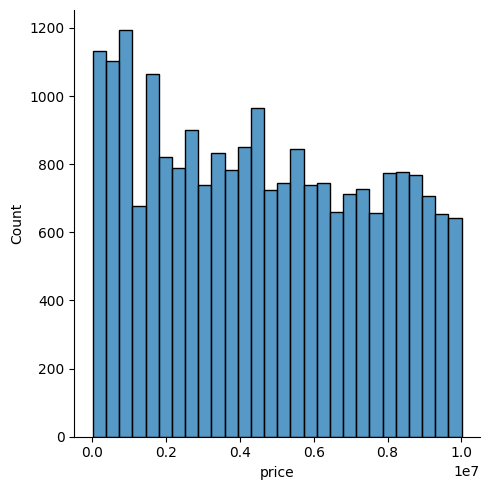

In [ ]:
#Distribución de la variable objetivo
sns.displot(train['price'])

In [ ]:
print('Skewness de la variable objetivo', train['price'].skew())

Skewness de la variable objetivo 0.1313996210801608


**Observación:**
- La variable objetivo presenta mínima asimetría hacía la izquierda.


## 3. Exploración de variables

#### 3.1 City Part Range (Sección de la ciudad)

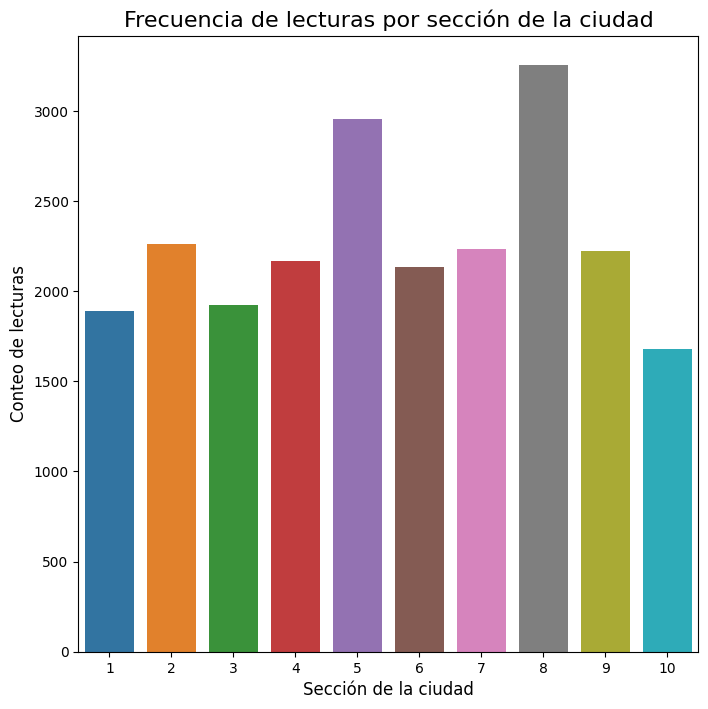

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cityPartRange_types_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
sns.countplot(x = 'cityPartRange', data = train).set_title("Frecuencia de lecturas por sección de la ciudad", fontsize=16)
ax.set_xticklabels(cityPartRange_types_labels)
plt.xlabel('Sección de la ciudad', fontsize=12)
plt.ylabel('Conteo de lecturas', fontsize=12)
plt.show()

Se puede observar que la sección 10 de la ciudad posee la menor cantidad de lecturas promedio entre todas las secciones, mientras que la sección 8 es el que tiene la mayor.

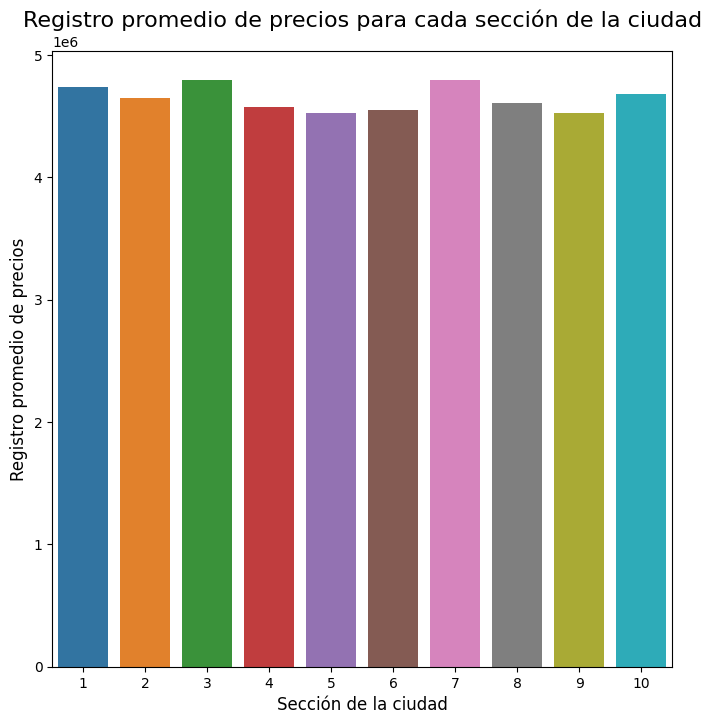

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
cityPartRange_types = train.groupby('cityPartRange').price.mean().reset_index()
sns.barplot(x ='cityPartRange', y ='price', data = cityPartRange_types).set_title("Registro promedio de precios para cada sección de la ciudad",
                                                                                                          fontsize=16)
ax.set_xticklabels(cityPartRange_types_labels)
plt.xlabel('Sección de la ciudad', fontsize=12)
plt.ylabel('Registro promedio de precios', fontsize=12)
plt.show()

In [ ]:
cityPartRange_types

,cityPartRange,price
0,1,4.739065e+06
1,2,4.648063e+06
2,3,4.793708e+06
3,4,4.573885e+06
4,5,4.528136e+06
5,6,4.549449e+06
6,7,4.790730e+06
7,8,4.606928e+06
8,9,4.522799e+06
9,10,4.682485e+06


Se puede observar que el precio promedio por sección de la ciudad no presenta mucha variación, donde la sección 9 posee el menor precio promedio y la sección 3 el mayor.

#### 3.2 Made (Año de construcción)

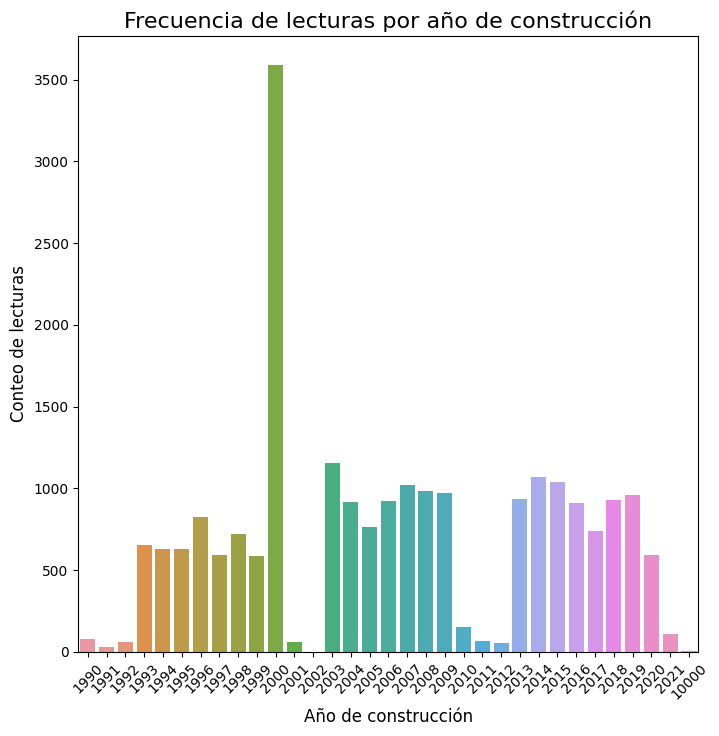

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
made_types_labels = train['made'].unique()
made_types_labels.sort()
sns.countplot(x = 'made', data = train).set_title("Frecuencia de lecturas por año de construcción", fontsize=16)
ax.set_xticklabels(made_types_labels)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Año de construcción', fontsize=12)
plt.ylabel('Conteo de lecturas', fontsize=12)
plt.show()

Se puede observar que el año 2000 posee la mayor cantidad de lecturas promedio entre todos los años de construcción, mientras que el año 2002 es el que tiene la menor, con una sola lectura. Así mismo, se puede observar que existen instancias cuyo año corresponde a 10000, lo cual corresponde a un dato anómalo, por lo que se eliminará en el preprocesado de datos.

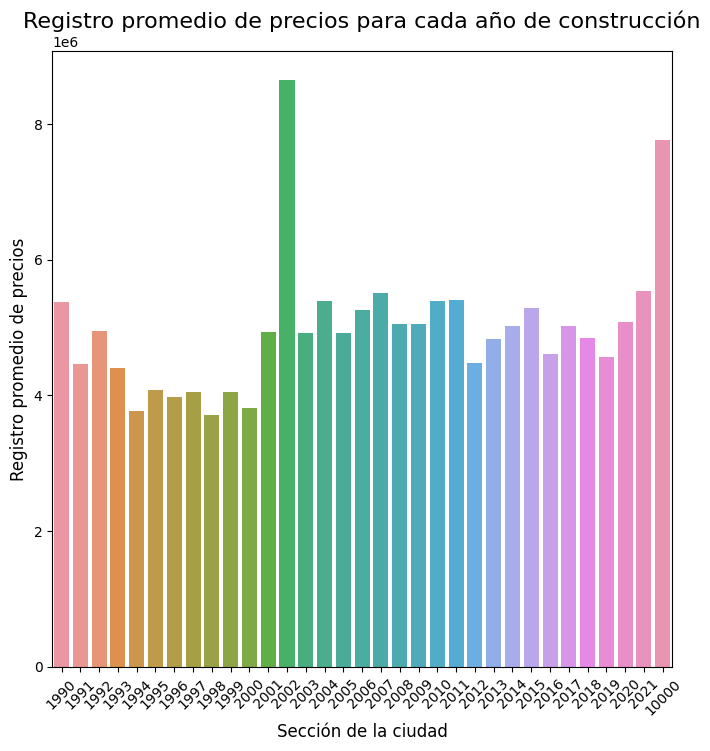

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
made_types = train.groupby('made').price.mean().reset_index()
sns.barplot(x ='made', y ='price', data = made_types).set_title("Registro promedio de precios para cada año de construcción",
                                                                                                          fontsize=16)
ax.set_xticklabels(made_types_labels)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Año de construcción', fontsize=12)
plt.ylabel('Registro promedio de precios', fontsize=12)
plt.show()

Se puede observar que el precio promedio para el año 2002 posee el mayor precio promedio, mientras que el año 1998 presenta el menor.

#### 3.3 Datos faltantes

In [ ]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = train.isnull().sum().sort_values(ascending=False)
percent         = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
id,0,0.0
squareMeters,0,0.0
hasGuestRoom,0,0.0
hasStorageRoom,0,0.0
garage,0,0.0
attic,0,0.0
basement,0,0.0
hasStormProtector,0,0.0
isNewBuilt,0,0.0
made,0,0.0


**Observación:**
- No existen datos faltantes dentro del database. Con motivo de cumplir con los requisitos planteados para esta actividad, se modificará en el preprocesado de datos.

#### 3.4 Correlación entre las diferentes variables

In [ ]:
#Matriz de correlaciones
corr_matrix = train.corr()

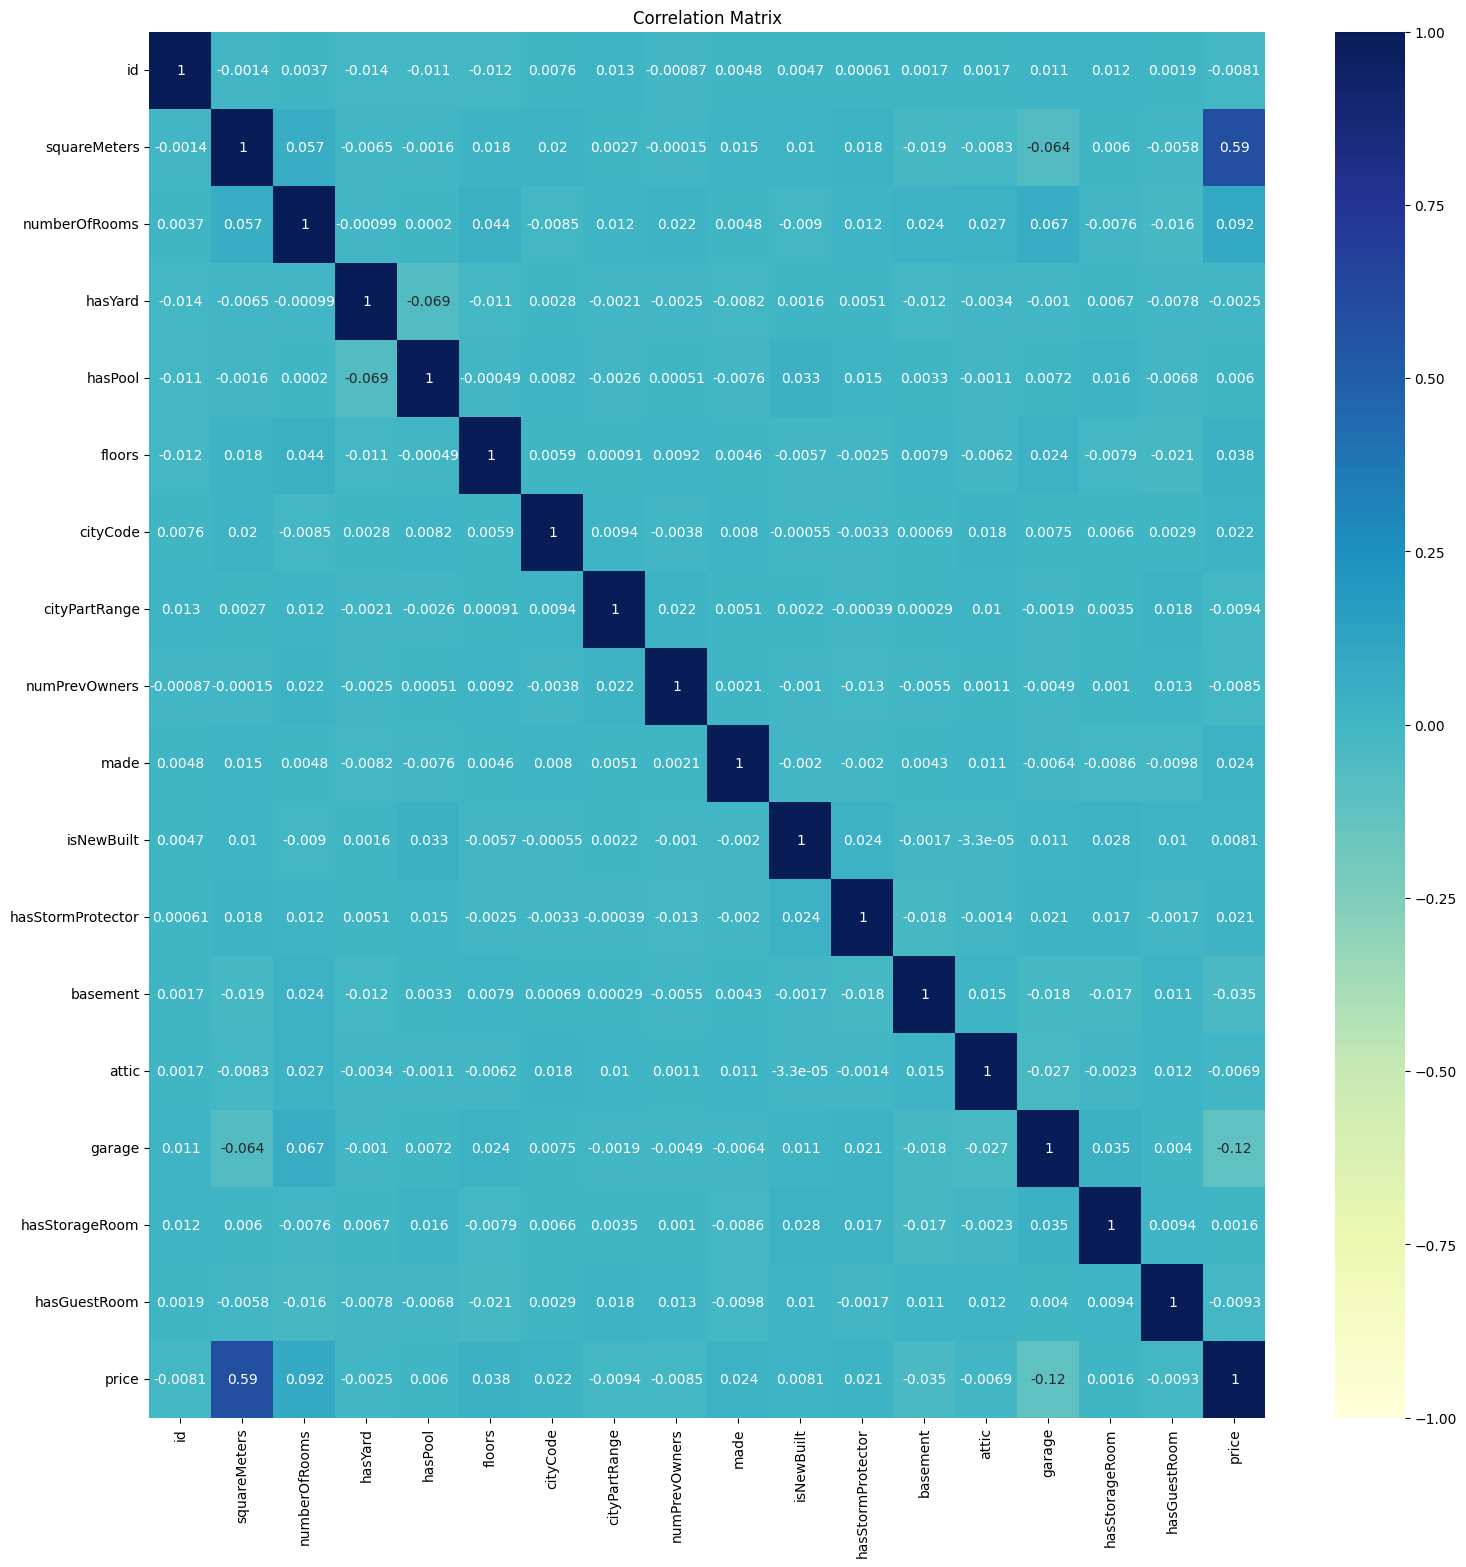

In [ ]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["price"].sort_values(ascending=False))
target_corr_df 

,price
price,1.000000
squareMeters,0.591749
numberOfRooms,0.091681
floors,0.038374
made,0.024270
cityCode,0.021986
hasStormProtector,0.020512
isNewBuilt,0.008080
hasPool,0.006023
hasStorageRoom,0.001567


Observaciones:
- Price y SquareMeters poseen la correlación más alta
- Al analizar las correlaciones entre las variables y la variable objetivo, se puede apreciar que la mayoría características básicas del edifico poseen una alta relación con su precio.

#### 3.5 Distribución de las variables numéricas

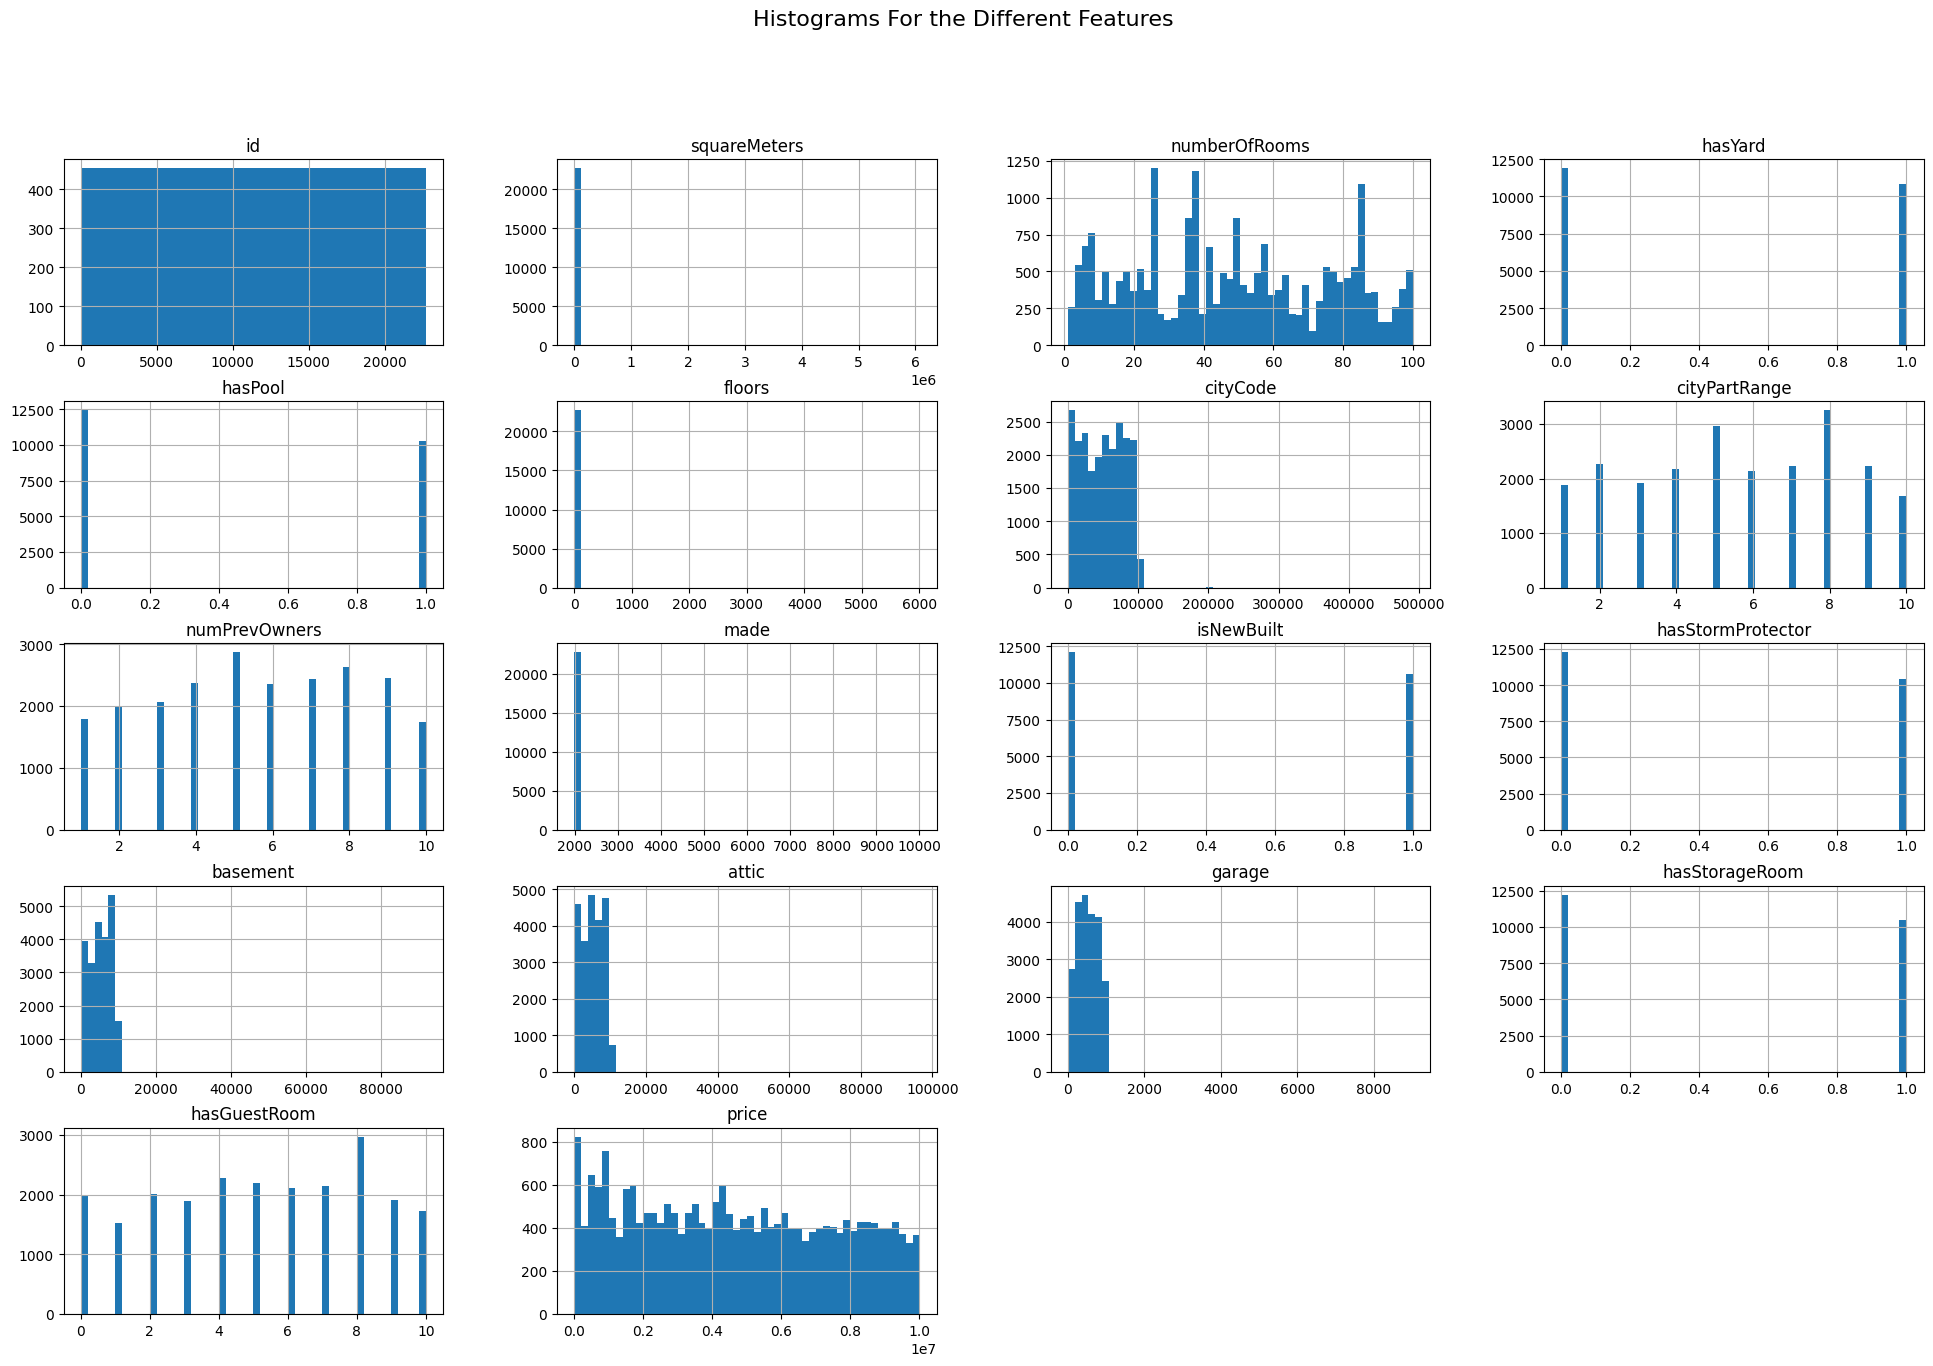

In [ ]:
#Gráficos de los histogramas de las distribuciones de las variables
train.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()